Recap and Applications
===
---
1. Review
2. Applications
    * Binary variables
    * Heteroskedasticity

 ---
## 1. Review
* 1st week - 
    * setwd( ) / getwd( )
    * library(tidyverse) / read.csv("file_name.csv")
    * summary( ) / data[obs, vars]
    * R Markdown
* 2nd week - 
    * cor( ) / cov( )
    * t.test(data\$var, conf.level = 0.99)
    * m <- lm(y ~ x, data = data_var) / summary(m) / library(stargazer) / stargazer(m1, m2)
    * plot(data\$var1, data\$var2) / fitted <- lm(data\$var1, data\$var2, data = data_var) / abline(fitted)
* 3nd week - 
    * filter( ) / select( ) / mutate( ) / arrange( ) / group_by( ) / summarize( )

In [12]:
library(tidyverse)
setwd("/Users/tino/Desktop/TA-Econometrics-II/notebooks_R")
beauty <- read.csv("beauty.csv")

In [13]:
beauty <- beauty[ , c(-1)]
str(beauty)
# wage: hourly wage
# exper: years of workforce experience
# female: = 1 if female
# looks: rate of beauty
# educ: years of schooling

'data.frame':	1260 obs. of  5 variables:
 $ wage  : num  5.73 4.28 7.96 11.57 11.42 ...
 $ exper : int  30 28 35 38 27 20 12 5 5 12 ...
 $ female: int  1 1 1 0 0 1 0 0 1 1 ...
 $ looks : int  4 3 4 3 3 3 3 4 3 3 ...
 $ educ  : int  14 12 10 16 16 12 16 16 16 12 ...


 ---
## 2. Applications
* Binary variables
* Heteroskedasticity

 ---
### 2-1. Binary Variables
* mutate
* lm

In [14]:
beauty <- mutate(beauty, d_exper = ifelse(exper > 25, 1, 0))
beauty[1:10, ]

wage,exper,female,looks,educ,d_exper
5.73,30,1,4,14,1
4.28,28,1,3,12,1
7.96,35,1,4,10,1
11.57,38,0,3,16,1
11.42,27,0,3,16,1
3.91,20,1,3,12,0
8.76,12,0,3,16,0
7.69,5,0,4,16,0
5.00,5,1,3,16,0
3.89,12,1,3,12,0


In [15]:
m <- lm(wage ~ d_exper, data = beauty)
summary(m)


Call:
lm(formula = wage ~ d_exper, data = beauty)

Residuals:
   Min     1Q Median     3Q    Max 
-6.530 -2.533 -1.006  1.387 71.897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.8229     0.1521  38.283  < 2e-16 ***
d_exper       1.7566     0.2898   6.061 1.79e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.596 on 1258 degrees of freedom
Multiple R-squared:  0.02837,	Adjusted R-squared:  0.0276 
F-statistic: 36.73 on 1 and 1258 DF,  p-value: 1.79e-09


 ---
### 2-2. Heteroskedasticity
* plot( )
* abline( )

In [17]:
lfit <- lm(wage ~ exper, data = beauty)

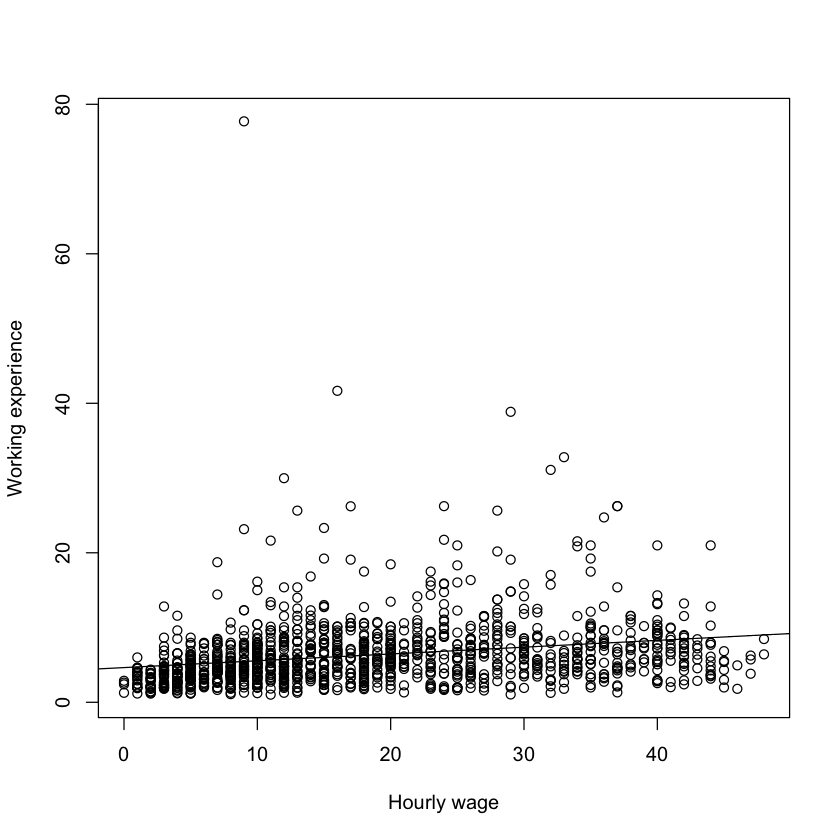

In [18]:
plot(beauty$exper, beauty$wage, xlab = "Hourly wage", ylab = "Working experience")
abline(lfit)